In [1]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt

from rapidfuzz import fuzz, utils

from oauth2client.service_account import ServiceAccountCredentials

In [ ]:
scope = ['https://spreadsheets.google.com/feeds', 
'https://www.googleapis.com/auth/drive'] 
my_mail = 'andrey@petavito.iam.gserviceaccount.com' 
path_to_credentials = 'crdentials.json'# Authorization 
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope) 
gs = gspread.authorize(credentials)

In [ ]:
table_url = 'https://docs.google.com/spreadsheets/d/1NtrD5PqsaHHN1AY1-7SOiQkRx9c5jSwQGBTBS1KNViI'  # Your table# Get this table 
work_sheet = gs.open_by_url(table_url) 
# Select 1st sheet 
sheet1 = work_sheet.sheet1 
# Get data in python lists format 
data = sheet1.get_all_values() 
# Get header from data 
headers = data.pop(0) 
# Create df 
df = pd.DataFrame(data, columns=headers) 
df.head()

,name,price,photo,description,city,ad_id,ad_description,time_update,parsing_time,ad_path,...,year,engine,transmission,mileage,power_horse,car_body,wheel_drive,fuel_type,time_delta,date_update
0,"Skoda Kodiaq 2.0 AMT, 2018, 172 000 км, с проб...",2370000,https://60.img.avito.st/image/1/1.AUCsJra4rama...,"172 000 км, 2 AMT (150 л.с.), внедорожник, пол...","Автодилер, Курская обл., Курск",4447751117,"В продаже Skoda Kodiaq, полный привод.Оригинал...",4 часа,2024-11-10 20:23:41,https://www.avito.ru/kursk/avtomobili/skoda_ko...,...,2018,2,AMT,172000,150,внедорожник,полный,дизель,0 days 04:00:00,2024-11-10 16:23:41
1,"Chevrolet Cruze 1.6 MT, 2010, 300 000 км, с пр...",440000,https://80.img.avito.st/image/1/1.wxzMk7a4b_X6...,"300 000 км, 1.6 MT (109 л.с.), седан, передний...","Нижегородская обл., Нижний Новгород",4246317166,Шевроле Круз 2010г 1.6 механика.Двигатель рабо...,4 дня,2024-11-10 20:23:37,https://www.avito.ru/nizhniy_novgorod/avtomobi...,...,2010,1.6,MT,300000,109,седан,передний,бензин,4 days 00:00:00,2024-11-06 20:23:37
2,"ВАЗ (LADA) 2110 1.6 MT, 2006, 150 000 км, с пр...",115000,https://30.img.avito.st/image/1/1.Nszptra4miXf...,"150 000 км, 1.6 MT (81 л.с.), седан, передний,...","Автодилер, Самарская обл., Чапаевск",4368816760,"На ходу, на учёте, 1.6 8клоп, колеса зима шипы...",5 дней,2024-11-10 20:23:34,https://www.avito.ru/chapaevsk/avtomobili/vaz_...,...,2006,1.6,MT,150000,81,седан,передний,бензин,5 days 00:00:00,2024-11-05 20:23:34
3,"ВАЗ (LADA) 2107 1.5 MT, 2010, 10 000 км, с про...",450000,https://30.img.avito.st/image/1/1.W8i3gba49yGB...,"10 000 км, 1.5 MT (72 л.с.), седан, задний, бе...","Республика Татарстан (Татарстан), Азнакаевский...",4375014598,"Ваз-2107, в отличном техническом состоянии, вс...",9 часов,2024-11-10 20:23:31,https://www.avito.ru/aznakaevo/avtomobili/vaz_...,...,2010,1.5,MT,10000,72,седан,задний,бензин,0 days 09:00:00,2024-11-10 11:23:31
4,"Mercedes-Benz Maybach S-класс 3.0 AT, 2016, 12...",4800000,https://20.img.avito.st/image/1/1.sIjDkra4HGH1...,"120 000 км, 3.0 AT (333 л.с.), седан, полный, ...",Москва,4620204580,Майбах S400 4matic в полном рестайлинге внаруж...,6 часов,2024-11-10 20:23:27,https://www.avito.ru/moskva/avtomobili/mercede...,...,2016,3,AT,120000,333,седан,полный,бензин,0 days 06:00:00,2024-11-10 14:23:27


In [ ]:
df.columns

Index(['name', 'price', 'photo', 'description', 'city', 'ad_id',
       'ad_description', 'time_update', 'parsing_time', 'ad_path', 'is_dealer',
       'model', 'year', 'engine', 'transmission', 'mileage', 'power_horse',
       'car_body', 'wheel_drive', 'fuel_type', 'time_delta', 'date_update'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40520 entries, 0 to 40519
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40520 non-null  object
 1   price           40520 non-null  object
 2   photo           40520 non-null  object
 3   description     40520 non-null  object
 4   city            40520 non-null  object
 5   ad_id           40520 non-null  object
 6   ad_description  40520 non-null  object
 7   time_update     40520 non-null  object
 8   parsing_time    40520 non-null  object
 9   ad_path         40520 non-null  object
 10  is_dealer       40520 non-null  object
 11  model           40520 non-null  object
 12  year            40520 non-null  object
 13  engine          40520 non-null  object
 14  transmission    40520 non-null  object
 15  mileage         40520 non-null  object
 16  power_horse     40520 non-null  object
 17  car_body        40520 non-null  object
 18  wheel_

In [ ]:
len(df.city.unique()), len(df.model.unique())

(5342, 904)

In [ ]:
car_brand_to_country = {
    'ВАЗ': 'Россия',
    'Toyota': 'Япония',
    'Tesla': 'США',
    'Acura': 'Япония',
    'Hyundai': 'Южная Корея',
    'Ford': 'США',
    'Opel': 'Германия',
    'Mazda': 'Япония',
    'Renault': 'Франция',
    'Mercedes-Benz': 'Германия',
    'Volkswagen': 'Германия',
    'OMODA': 'Китай',
    'Audi': 'Германия',
    'Honda': 'Япония',
    'Volvo': 'Швеция',
    'Kia': 'Южная Корея',
    'Dodge': 'США',
    'Skoda': 'Чехия',
    'Peugeot': 'Франция',
    'Geely': 'Китай',
    'Changan': 'Китай',
    'Lexus': 'Япония',
    'Citroen': 'Франция',
    'LIFAN': 'Китай',
    'LiXiang': 'Китай',
    'Mitsubishi': 'Япония',
    'Chery': 'Китай',
    'Dongfeng': 'Китай',
    'Chevrolet': 'США',
    'Chrysler': 'США',
    'BMW': 'Германия',
    'Great Wall': 'Китай',
    'Nissan': 'Япония',
    'Land Rover': 'Великобритания', 
    'Nissan': 'Япония',
    'Suzuki': 'Япония',
    'Новый': 'Россия',
    'УАЗ': 'Россия',
    'ТагАЗ': 'Россия',
    'ГАЗ': 'Россия',
    'FIAT': 'Италия',
    'Datsun': 'Япония',
    'Daewoo': 'Южная Корея', 
    'Genesis': 'Южная Корея',
    'JAC': 'Китай',
    'Rover': 'Великобритания',
    'Infiniti': 'Япония',
    'Subaru': 'Япония',
    'Porsche': 'Германия',
    'MINI': 'Великобритания',
    'SsangYong': 'Южная Корея',
    'ВИС': 'Россия',
    'Haima': 'Китай',
    'Jeep': 'США',
    'RAM': 'США',
    'Dodge': 'США',
    'Jaguar': 'Великобритания',
    'Cadillac': 'США',
    'Vortex': 'Россия',
    'HAVAL': 'Китай',
    'ЗАЗ': 'Украина',
    'Ravon': 'Узбекистан',
    'Daihatsu': 'Япония',
    'EXEED': 'Китай',
    'BYD': 'Китай',
    'Москвич': 'Россия',
    'Iran': 'Иран',
    'ИЖ': 'Россия',
    'SEAT': 'Испания',
    'Saab': 'Швеция',
    'Brilliance': 'Китай',
    'FAW': 'Китай',
    'Zeekr': 'Китай',
    "Pagani": "Италия",
    "Ferrari": "Италия",
    "Lamborghini": "Италия",
    "Aston Martin": "Великобритания",
    "Lotus": "Великобритания",
    "McLaren": "Великобритания",
    "Buick": "США",
    "Lincoln": "США",
    "Alfa Romeo": "Италия",
    "Peugeot": "Франция",
    "Seat": "Испания",
    "Skoda": "Чехия",
    "Tata": "Индия",
    "Mahindra": "Индия",
    "Proton": "Малайзия",
    "Voyah": "Китай",
    "ZX": "Китай",
    "Derways": "Россия",
    "Doninvest": "Россия",
    "Jetour": "Китай",
    "Dacia": "Румыния",
    "Maserati": "Италия",
    "JAECOO": "Китай",
    "ZOTYE": "Китай",
    "Smart": "Германия",
    "Bugatti": "Франция",
    "Tianye": "Китай",
    "Богдан": "Украина",
    "Wey": "Китай",
    "Hafei": "Китай",
    "Jetta": "Китай",
    "Pontiac": "США",
    "Isuzu": "Япония",
    "JMC": "Китай",
    "Chana": "Китай",
    "LDV": "Великобритания",
    "BAIC": "Китай",
    "Iveco": "Италия",
    "Saturn": "США",
    "Tank": "Китай",
    "Trabant": "Германия",
    "GMC": "США",
    "GAC": "Китай",
    "Landwind": "Китай",
    "ЛуАЗ": "Украина",
    "Kaiyi": "Китай",

}

In [ ]:
# Функция для извлечения марки автомобиля
def extract_brand(model):
    # Разделяем строку по пробелам и возвращаем первую часть
    for brand in car_brand_to_country.keys():
        if (
            brand in model
            or fuzz.token_set_ratio(brand, model, processor=utils.default_process) >= 95
        ):
            return car_brand_to_country.get(brand)
    return 'Другое'

In [ ]:
df['brand'] = df['model'].apply(extract_brand)

In [ ]:
df.brand.unique()

array(['Чехия', 'США', 'Россия', 'Германия', 'Южная Корея', 'Франция',
       'Япония', 'Италия', 'Китай', 'Великобритания', 'Швеция', 'Украина',
       'Иран', 'Узбекистан', 'Румыния', 'Испания', 'Индия'], dtype=object)

In [ ]:
subject_to_state_of_russia = {
    "Республика Адыгея": "Южный",
    "Адыгейская Республика": "Южный",
    "Республика Башкортостан": "Приволжский",
    "Башкортостанская Республика": "Приволжский",
    "Республика Бурятия": "Сибирский",
    "Бурятская Республика": "Сибирский",
    "Республика Алтай": "Сибирский",
    "Алтайская Республика": "Сибирский",
    "Республика Дагестан": "Южный",
    "Дагестанская Республика": "Южный",
    "Республика Ингушетия": "Южный",
    "Ингушская Республика": "Южный",
    "Республика Кабардино-Балкарская": "Южный",
    "Кабардино-Балкарская Республика": "Южный",
    "Республика Калмыкия": "Южный",
    "Калмыцкая Республика": "Южный",
    "Республика Карачаево-Черкесская": "Южный",
    "Карачаево-Черкесская Республика": "Южный",
    "Республика Карелия": "Северо-Западный",
    "Карельская Республика": "Северо-Западный",
    "Республика Коми": "Северо-Западный",
    "Коми Республика": "Северо-Западный",
    "Республика Крым": "Южный",
    "Крымская Республика": "Южный",
    "Республика Марий Эл": "Приволжский",
    "Марийская Республика": "Приволжский",
    "Республика Мордовия": "Приволжский",
    "Мордовская Республика": "Приволжский",
    "Республика Саха": "Дальневосточный",
    "Республика Саха (Якутия)": "Дальневосточный",
    "Якутская Республика": "Дальневосточный",
    "Республика Северная Осетия": "Южный",
    "Северная Осетия": "Южный",
    "Республика Северная Осетия - Алания": "Южный",
    "Республика Татарстан": "Приволжский",
    "Татарстанская Республика": "Приволжский",
    "Республика Тыва": "Сибирский",
    "Тывинская Республика": "Сибирский",
    "Республика Удмуртская": "Приволжский",
    "Удмуртская Республика": "Приволжский",
    "Республика Хакасия": "Сибирский",
    "Хакасская Республика": "Сибирский",
    "Республика Чечня": "Южный",
    "Чеченская Республика": "Южный",
    "Чувашская Республика": "Приволжский",
    "Чувашская Республика - Чувашия": "Приволжский",
    "Краснодарский край": "Южный",
    "Красноярский край": "Сибирский",
    "Алтайский край": "Сибирский",
    "Приморский край": "Дальневосточный",
    "Ставропольский край": "Южный",
    "Хабаровский край": "Дальневосточный",
    "Забайкальский край": "Дальневосточный",
    "Амурская обл.": "Дальневосточный",
    "Архангельская обл.": "Северо-Западный",
    "Астраханская обл.": "Южный",
    "Белгородская обл.": "Центральный",
    "Брянская обл.": "Центральный",
    "Владимирская обл.": "Центральный",
    "Волгоградская обл.": "Южный",
    "Вологодская обл.": "Северо-Западный",
    "Воронежская обл.": "Центральный",
    "Донецкая Народная Республика": "Южный",
    "Ивановская обл.": "Центральный",
    "Иркутская обл.": "Сибирский",
    "Калининградская обл.": "Северо-Западный",
    "Калужская обл.": "Центральный",
    "Камчатский край": "Дальневосточный",
    "Кемеровская обл.": "Сибирский",
    "Кировская обл.": "Приволжский",
    "Костромская обл.": "Центральный",
    "Курганская обл.": "Уральский",
    "Курская обл.": "Центральный",
    "Ленинградская обл.": "Северо-Западный",
    "Липецкая обл.": "Центральный",
    "Луганская Народная Республика": "Южный",
    "Магаданская обл.": "Дальневосточный",
    "Московская обл.": "Центральный",
    "Мурманская обл.": "Северо-Западный",
    "Нижегородская обл.": "Приволжский",
    "Новгородская обл.": "Северо-Западный",
    "Новосибирская обл.": "Сибирский",
    "Омская обл.": "Сибирский",
    "Оренбургская обл.": "Приволжский",
    "Орловская обл.": "Центральный",
    "Пензенская обл.": "Приволжский",
    "Пермский край": "Приволжский",
    "Псковская обл.": "Северо-Западный",
    "Ростовская обл.": "Южный",
    "Рязанская обл.": "Центральный",
    "Самарская обл.": "Приволжский",
    "Саратовская обл.": "Приволжский",
    "Сахалинская обл.": "Дальневосточный",
    "Свердловская обл.": "Уральский",
    "Смоленская обл.": "Центральный",
    "Тамбовская обл.": "Центральный",
    "Тверская обл.": "Центральный",
    "Томская обл.": "Сибирский",
    "Тульская обл.": "Центральный",
    "Тюменская обл.": "Уральский",
    "Ульяновская обл.": "Приволжский",
    "Челябинская обл.": "Уральский",
    "Ярославская обл.": "Центральный",
    "Санкт-Петербург": "Северо-Западный",
    "Севастополь": "Южный",
    "Москва": "Центральный",
    "Еврейская АО": "Дальневосточный",
    "Ненецкий АО": "Северо-Западный",
    "Ханты-Мансийский АО - Югра": "Уральский",
    "Ханты-Мансийский АО": "Уральский",
    "Херсонская обл.": "Южный",
    "Чукотский АО": "Дальневосточный",
    "Ямало-Ненецкий АО": "Уральский",
}


In [ ]:
def get_region(adress):
    for subregion in subject_to_state_of_russia.keys():
        if (
            subregion in adress
            or fuzz.WRatio(subregion, adress, processor=utils.default_process) >= 90
        ):
            return subject_to_state_of_russia.get(subregion)
    return 'Другое'

In [ ]:
df['region'] = df['city'].apply(get_region)


In [ ]:
len(df.region.unique()), len(df.brand.unique())

(8, 17)

In [ ]:
df.brand.unique()

array(['Чехия', 'США', 'Россия', 'Германия', 'Южная Корея', 'Франция',
       'Япония', 'Италия', 'Китай', 'Великобритания', 'Швеция', 'Украина',
       'Иран', 'Узбекистан', 'Румыния', 'Испания', 'Индия'], dtype=object)

In [ ]:
df.region.unique()

array(['Центральный', 'Приволжский', 'Сибирский', 'Южный',
       'Северо-Западный', 'Уральский', 'Другое', 'Дальневосточный'],
      dtype=object)

In [ ]:
df.head(3)

,name,price,photo,description,city,ad_id,ad_description,time_update,parsing_time,ad_path,...,transmission,mileage,power_horse,car_body,wheel_drive,fuel_type,time_delta,date_update,brand,region
0,"Skoda Kodiaq 2.0 AMT, 2018, 172 000 км, с проб...",2370000,https://60.img.avito.st/image/1/1.AUCsJra4rama...,"172 000 км, 2 AMT (150 л.с.), внедорожник, пол...","Автодилер, Курская обл., Курск",4447751117,"В продаже Skoda Kodiaq, полный привод.Оригинал...",4 часа,2024-11-10 20:23:41,https://www.avito.ru/kursk/avtomobili/skoda_ko...,...,AMT,172000,150,внедорожник,полный,дизель,0 days 04:00:00,2024-11-10 16:23:41,Чехия,Центральный
1,"Chevrolet Cruze 1.6 MT, 2010, 300 000 км, с пр...",440000,https://80.img.avito.st/image/1/1.wxzMk7a4b_X6...,"300 000 км, 1.6 MT (109 л.с.), седан, передний...","Нижегородская обл., Нижний Новгород",4246317166,Шевроле Круз 2010г 1.6 механика.Двигатель рабо...,4 дня,2024-11-10 20:23:37,https://www.avito.ru/nizhniy_novgorod/avtomobi...,...,MT,300000,109,седан,передний,бензин,4 days 00:00:00,2024-11-06 20:23:37,США,Приволжский
2,"ВАЗ (LADA) 2110 1.6 MT, 2006, 150 000 км, с пр...",115000,https://30.img.avito.st/image/1/1.Nszptra4miXf...,"150 000 км, 1.6 MT (81 л.с.), седан, передний,...","Автодилер, Самарская обл., Чапаевск",4368816760,"На ходу, на учёте, 1.6 8клоп, колеса зима шипы...",5 дней,2024-11-10 20:23:34,https://www.avito.ru/chapaevsk/avtomobili/vaz_...,...,MT,150000,81,седан,передний,бензин,5 days 00:00:00,2024-11-05 20:23:34,Россия,Приволжский


In [ ]:
df_ml = df.drop([
    'name', 'photo', 'description',
    'city', 'ad_id', 'time_update',
    'parsing_time', 'ad_path', 'model',
    'time_delta', 'date_update'
], axis=1)

In [ ]:
df_ml.head()

,price,ad_description,is_dealer,year,engine,transmission,mileage,power_horse,car_body,wheel_drive,fuel_type,brand,region
0,2370000,"В продаже Skoda Kodiaq, полный привод.Оригинал...",TRUE,2018,2,AMT,172000,150,внедорожник,полный,дизель,Чехия,Центральный
1,440000,Шевроле Круз 2010г 1.6 механика.Двигатель рабо...,FALSE,2010,1.6,MT,300000,109,седан,передний,бензин,США,Приволжский
2,115000,"На ходу, на учёте, 1.6 8клоп, колеса зима шипы...",TRUE,2006,1.6,MT,150000,81,седан,передний,бензин,Россия,Приволжский
3,450000,"Ваз-2107, в отличном техническом состоянии, вс...",FALSE,2010,1.5,MT,10000,72,седан,задний,бензин,Россия,Приволжский
4,4800000,Майбах S400 4matic в полном рестайлинге внаруж...,FALSE,2016,3,AT,120000,333,седан,полный,бензин,Германия,Центральный


In [ ]:
df_ml.columns

Index(['price', 'ad_description', 'is_dealer', 'year', 'engine',
       'transmission', 'mileage', 'power_horse', 'car_body', 'wheel_drive',
       'fuel_type', 'brand', 'region'],
      dtype='object')

In [ ]:
df_ml.columns = ['price', 'text', 'is_dealer', 'year', 'engine',
       'transmission', 'mileage', 'power_horse', 'car_body', 'wheel_drive',
       'fuel_type', 'brand', 'region']

In [ ]:
df_ml.head()

,price,text,is_dealer,year,engine,transmission,mileage,power_horse,car_body,wheel_drive,fuel_type,brand,region
0,2370000,"В продаже Skoda Kodiaq, полный привод.Оригинал...",TRUE,2018,2,AMT,172000,150,внедорожник,полный,дизель,Чехия,Центральный
1,440000,Шевроле Круз 2010г 1.6 механика.Двигатель рабо...,FALSE,2010,1.6,MT,300000,109,седан,передний,бензин,США,Приволжский
2,115000,"На ходу, на учёте, 1.6 8клоп, колеса зима шипы...",TRUE,2006,1.6,MT,150000,81,седан,передний,бензин,Россия,Приволжский
3,450000,"Ваз-2107, в отличном техническом состоянии, вс...",FALSE,2010,1.5,MT,10000,72,седан,задний,бензин,Россия,Приволжский
4,4800000,Майбах S400 4matic в полном рестайлинге внаруж...,FALSE,2016,3,AT,120000,333,седан,полный,бензин,Германия,Центральный


In [ ]:
numeric_columns = [
    'year', 'engine',
    'mileage', 'power_horse',
    'price'
]

In [ ]:
df_ml[['is_dealer']] = df_ml[['is_dealer']].apply(lambda x: x=="TRUE")
df_ml[numeric_columns] = df_ml[numeric_columns].apply(pd.to_numeric)

In [ ]:
df_ml.corr(numeric_only=True)

,price,is_dealer,year,engine,mileage,power_horse
price,1.000000,0.028053,0.203577,0.217954,-0.118565,0.358329
is_dealer,0.028053,1.000000,0.074146,0.039065,-0.046619,0.070753
year,0.203577,0.074146,1.000000,-0.019600,-0.446394,0.175154
engine,0.217954,0.039065,-0.019600,1.000000,0.118812,0.826218
mileage,-0.118565,-0.046619,-0.446394,0.118812,1.000000,0.018765
power_horse,0.358329,0.070753,0.175154,0.826218,0.018765,1.000000


Проведем графический анализ. Для этого рассмотрим диаграммы рассеяния SalePrice vs all для числовых и категориальных переменных.

Для реализации напишем функцию.

In [ ]:
def plot_scatter(indeps: list, dep: str, df: pd.DataFrame) -> None:
    '''
    Функция для построения диаграмм рассеяния X vs Y в одной фигуре с
    динамическим количеством строк и 3 графиками в каждой строке.

    Parameters:
    indeps (list): Список названий столбцов независимых переменных модели.
    dep (str): Название столбца зависимой переменной модели.
    df (pd.DataFrame): DataFrame с данными.
    '''

    df_notna = df.dropna()
    num_rows = (len(indeps) + 2) // 2 # Округляем вверх, чтобы вместить все графики
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows)) # Создаем фигуру
    fig.suptitle(f'Диаграммы рассеяния для {dep}') # Заголовок фигуры

    for i, indep in enumerate(indeps):
        row = i // 2 # Вычисляем номер строки
        col = i % 2 # Вычисляем номер столбца
        x = df_notna[indep]
        y = df_notna[dep]
        axes[row, col].scatter(x, y)
        axes[row, col].set_xlabel(indep)
        axes[row, col].set_ylabel(dep)
        axes[row, col].set_title(f'{indep} vs {dep}')

    # Удаляем пустые оси
    for i in range(len(indeps), num_rows * 2):
        row = i // 2
        col = i % 2
        fig.delaxes(axes[row, col])

    plt.tight_layout() # Автоматически регулируем расположение графиков
    plt.show()

In [ ]:
numeric_columns.remove('price')
numeric_columns

['year', 'engine', 'mileage', 'power_horse']

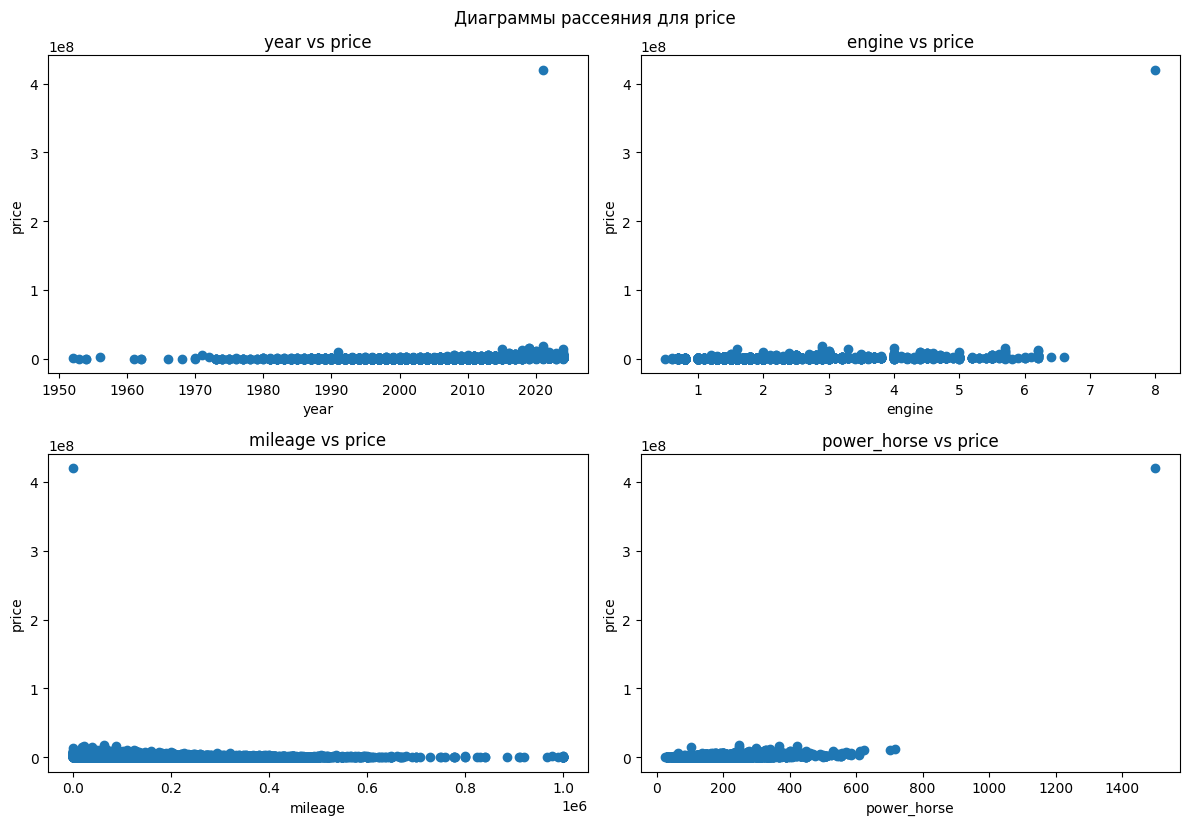

In [ ]:
plot_scatter(numeric_columns, 'price', df_ml)

In [ ]:
df_ml[df_ml.price == df_ml.price.max()]

,price,text,is_dealer,year,engine,transmission,mileage,power_horse,car_body,wheel_drive,fuel_type,brand,region
8721,420000000,"Наличие: в Москве, по адресу Подвойского 5-19 ...",True,2021,8.0,AMT,595,1500,купе,полный,бензин,Франция,Центральный


In [ ]:
len(df_ml)

40520

In [ ]:
df_ml = df_ml[df_ml.price <= df_ml.price.quantile(0.999)]
df_ml = df_ml[df_ml.price >= df_ml.price.quantile(0.001)]
len(df_ml)

40520

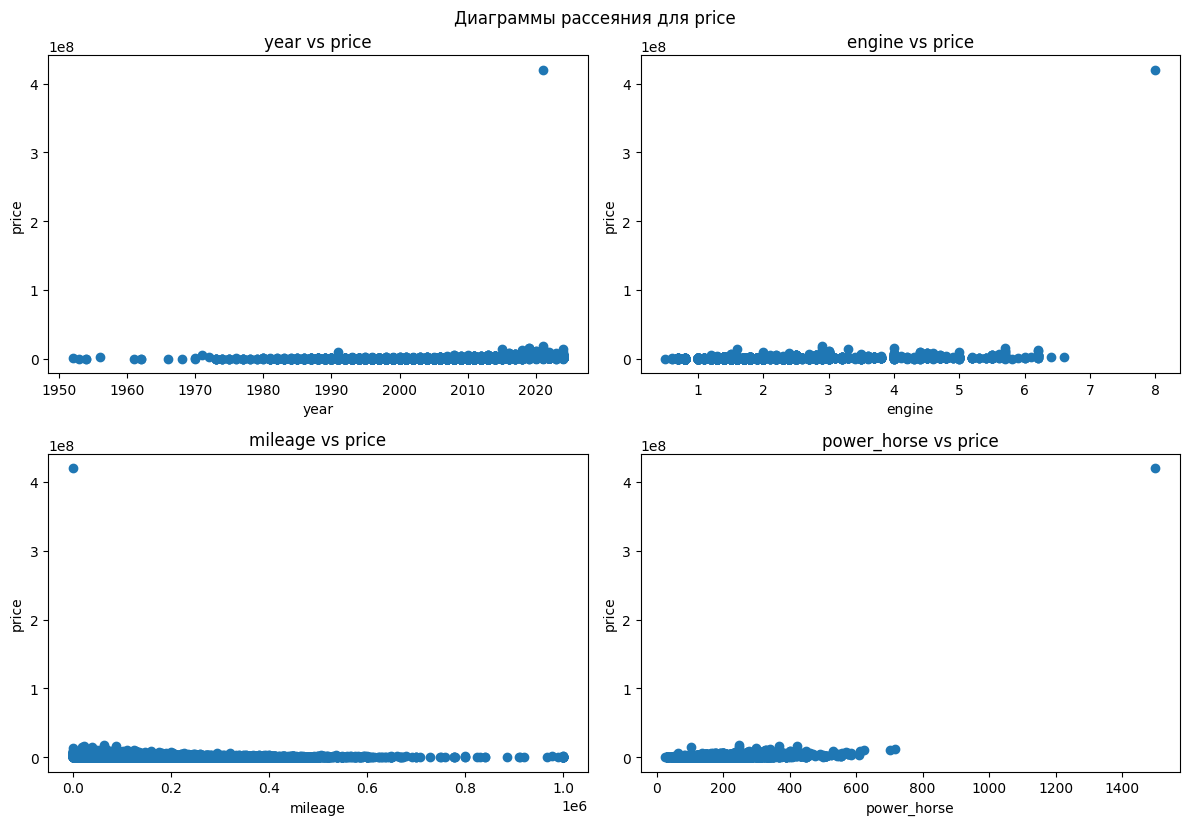

In [65]:
plot_scatter(numeric_columns, 'price', df_ml)

In [66]:
df_ml.to_csv('../data/ml_data.csv', index=False)